In [ ]:
#Do not run this cell after first run (after first run, takes about 5 minutes to run)
from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
ids = my_galaxy_population.select_galaxies(redshift=2, mass_min=10.5, mass_max=12)

import h5py
with h5py.File('galaxy_population_data_2.hdf5', 'w') as f:
    #writing data
    d1 = f.create_dataset('ids', data = my_galaxy_population.select_galaxies(redshift=2, mass_min=10.5, mass_max=12))
    d2 = f.create_dataset('mean_age', data = my_galaxy_population.get_mean_stellar_age())
    d3 = f.create_dataset('median_age', data = my_galaxy_population.get_median_stellar_age())
    d4 = f.create_dataset('current_SFR', data = my_galaxy_population.get_timeaverage_stellar_formation_rate(timescale=0))
    d5 = f.create_dataset('average_SFR_0.5', data = my_galaxy_population.get_timeaverage_stellar_formation_rate(timescale=0.5))
    d6 = f.create_dataset('average_SFR_1', data = my_galaxy_population.get_timeaverage_stellar_formation_rate(timescale=1))
    d7 = f.create_dataset('average_SFR_2', data = my_galaxy_population.get_timeaverage_stellar_formation_rate(timescale=2))
    d8 = f.create_dataset('SFR_ratio_1', data = my_galaxy_population.get_stellar_formation_rate_ratio(timescale=1))
    d9 = f.create_dataset('SFR_ratio_0.5', data = my_galaxy_population.get_stellar_formation_rate_ratio(timescale=0.5))
    d10 = f.create_dataset('effective_radius', data = my_galaxy_population.get_effective_radius())
    d11 = f.create_dataset('halfmass_radius', data = my_galaxy_population.get_halfmass_rad_stars())
    d12 = f.create_dataset('mean_metallicity', data = my_galaxy_population.get_mean_stellar_metallicity())
    d13 = f.create_dataset('total_mass', data = my_galaxy_population.get_total_stellar_mass())

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history

import h5py
with h5py.File('galaxy_population_data_2.hdf5', 'r') as f:
    ids = f['ids'][:]
    mean_age = f['mean_age'][:]
    median_age = f['median_age'][:]
    current_SFR = f['current_SFR'][:] 
    average_SFR_0_5 = f['average_SFR_0.5'][:]
    average_SFR_1 = f['average_SFR_1'][:]
    average_SFR_2 = f['average_SFR_2'][:]
    SFR_ratio_1 = f['SFR_ratio_1'][:]
    SFR_ratio_0_5 = f['SFR_ratio_0.5'][:]
    effective_radius = f['effective_radius'][:]
    halfmass_radius = f['halfmass_radius'][:]
    mean_metallicity = f['mean_metallicity'][:]
    total_mass = f['total_mass'][:]

**Effective Radius (kpc) vs Stellar Mass ($\log_{10} M_\odot$) for Quenched Galaxies over 1 Gyr**

red  = Current SFR < 2 & Average SFR over last 1 Gyr < 2

blue = Current SFR < 2 & Average SFR over last 1 Gyr $\geq$ 2

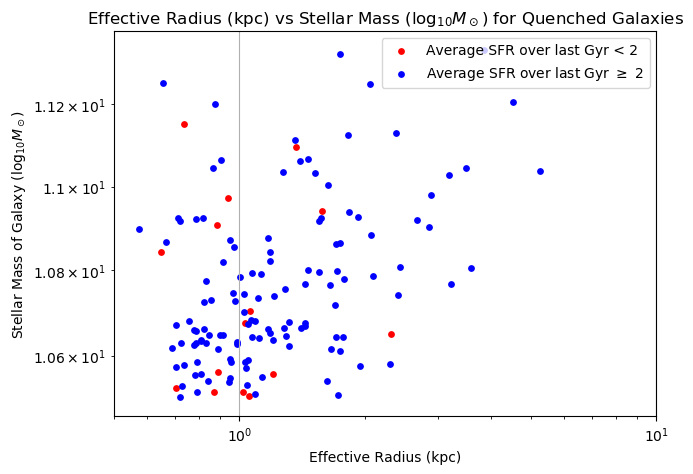

In [8]:
plt.style.use('default')
plt.figure(figsize=(7,5)) # 10 is width, 7 is height
plt.scatter(effective_radius[(current_SFR<2)&(average_SFR_1<2)], total_mass[(current_SFR<2)&(average_SFR_1<2)], c='r', s=15, label='Average SFR over last Gyr < 2')
plt.scatter(effective_radius[(current_SFR<2)&(average_SFR_1>=2)], total_mass[(current_SFR<2)&(average_SFR_1>=2)], c='b', s=15, label='Average SFR over last Gyr $\geq$ 2')
plt.xlim(0.5, 1e1)
plt.grid()
plt.legend()
plt.title('Effective Radius (kpc) vs Stellar Mass ($\log_{10} M_\odot$) for Quenched Galaxies')
plt.xlabel('Effective Radius (kpc)')
plt.ylabel('Stellar Mass of Galaxy ($\log_{10} M_\odot$)')
plt.xscale('log')
plt.yscale('log')

**Effective Radius (kpc) vs Stellar Mass ($\log_{10} M_\odot$) for Quenched Galaxies & Starburst Galaxies over 1 Gyr**

yellow = Current SFR > 2 

red    = Current SFR < 2 & Average SFR over last 1 Gyr < 2

blue   = Current SFR < 2 & Average SFR over last 1 Gyr $\geq$ 2

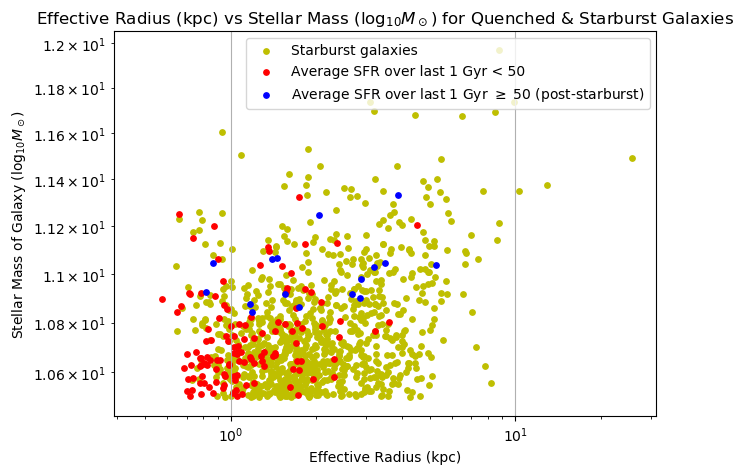

In [9]:
plt.style.use('default')
plt.figure(figsize=(7,5)) # 10 is width, 7 is height
plt.scatter(effective_radius[current_SFR>2], total_mass[current_SFR>2], c='y', s=15, label='Starburst galaxies')
plt.scatter(effective_radius[(current_SFR<2)&(average_SFR_1<50)], total_mass[(current_SFR<2)&(average_SFR_1<50)], c='r', s=15, label='Average SFR over last 1 Gyr < 50')
plt.scatter(effective_radius[(current_SFR<2)&(average_SFR_1>=50)], total_mass[(current_SFR<2)&(average_SFR_1>=50)], c='b', s=15, label='Average SFR over last 1 Gyr $\geq$ 50 (post-starburst)')
#plt.xlim(0.5, 1e1)
#plt.ylim(0.5, 30)
plt.grid()
plt.legend()
#plt.colorbar(label = '$\log_{10}$ (Average SFR over last Gyr)')
plt.title('Effective Radius (kpc) vs Stellar Mass ($\log_{10} M_\odot$) for Quenched & Starburst Galaxies')
plt.xlabel('Effective Radius (kpc)')
plt.ylabel('Stellar Mass of Galaxy ($\log_{10} M_\odot$)')
plt.xscale('log')
plt.yscale('log')

**Effective Radius (kpc) vs Stellar Mass ($\log_{10} M_\odot$) for Quenched Galaxies over 1 Gyr**

red    = Current SFR < 2 & Average SFR over last 1 Gyr < 50

blue   = Current SFR < 2 & Average SFR over last 1 Gyr $\geq$ 50

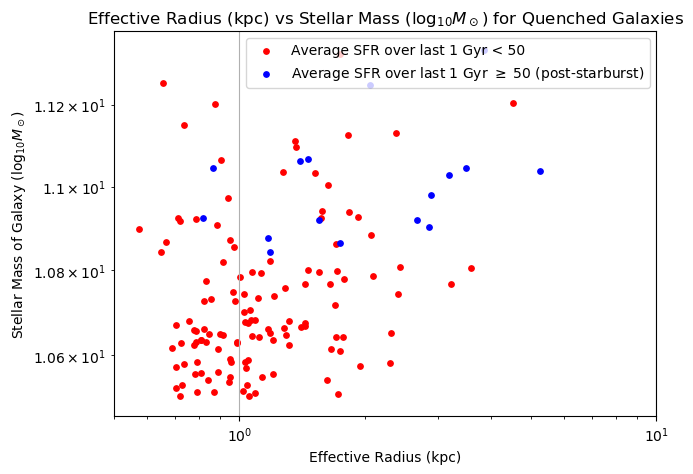

In [12]:
plt.style.use('default')
plt.figure(figsize=(7,5)) # 10 is width, 7 is height
plt.scatter(effective_radius[(current_SFR<2)&(average_SFR_1<50)], total_mass[(current_SFR<2)&(average_SFR_1<50)], c='r', s=15, label='Average SFR over last 1 Gyr < 50')
plt.scatter(effective_radius[(current_SFR<2)&(average_SFR_1>=50)], total_mass[(current_SFR<2)&(average_SFR_1>=50)], c='b', s=15, label='Average SFR over last 1 Gyr $\geq$ 50 (post-starburst)')
plt.xlim(0.5, 1e1)
#plt.ylim(0.5, 30)
plt.grid()
plt.legend()
#plt.colorbar(label = '$\log_{10}$ (Average SFR over last Gyr)')
plt.title('Effective Radius (kpc) vs Stellar Mass ($\log_{10} M_\odot$) for Quenched Galaxies')
plt.xlabel('Effective Radius (kpc)')
plt.ylabel('Stellar Mass of Galaxy ($\log_{10} M_\odot$)')
plt.xscale('log')
plt.yscale('log')
###(average_SFR_1>=50) are rapidly quenched. Somehow these are all over the place.
###The ones that have remained quenched are more compact.

**Stellar Half-Mass Radius (kpc) vs Stellar Mass ($\log_{10} M_\odot$) for Quenched Galaxies over 1 Gyr**

red    = Current SFR < 2 & Average SFR over last 1 Gyr < 50

blue   = Current SFR < 2 & Average SFR over last 1 Gyr $\geq$ 50

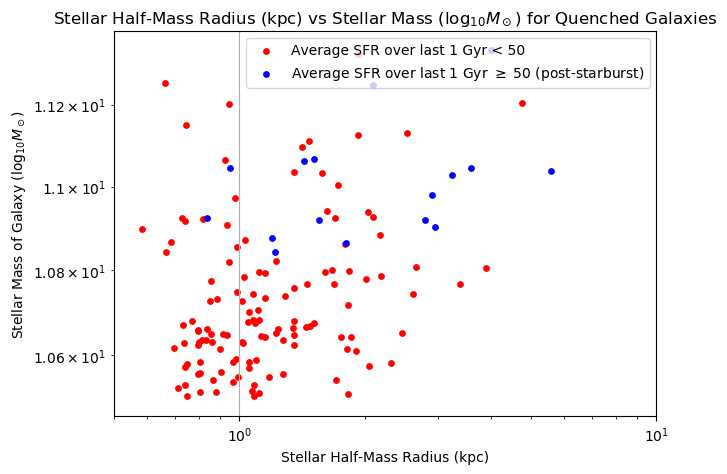

In [14]:
plt.style.use('default')
plt.figure(figsize=(7,5)) # 10 is width, 7 is height
plt.scatter(halfmass_radius[(current_SFR<2)&(average_SFR_1<50)], total_mass[(current_SFR<2)&(average_SFR_1<50)], c='r', s=15, label='Average SFR over last 1 Gyr < 50')
plt.scatter(halfmass_radius[(current_SFR<2)&(average_SFR_1>=50)], total_mass[(current_SFR<2)&(average_SFR_1>=50)], c='b', s=15, label='Average SFR over last 1 Gyr $\geq$ 50 (post-starburst)')
plt.xlim(0.5, 1e1)
#plt.ylim(0.5, 30)
plt.grid()
plt.legend()
#plt.colorbar(label = '$\log_{10}$ (Average SFR over last Gyr)')
plt.title('Stellar Half-Mass Radius (kpc) vs Stellar Mass ($\log_{10} M_\odot$) for Quenched Galaxies')
plt.xlabel('Stellar Half-Mass Radius (kpc)')
plt.ylabel('Stellar Mass of Galaxy ($\log_{10} M_\odot$)')
plt.xscale('log')
plt.yscale('log')
#Similar relation as above

**Effective Radius (kpc) vs Stellar Mass ($\log_{10} M_\odot$) for Quenched Galaxies over 0.5 Gyr**

red    = Current SFR < 2 & Average SFR over last 0.5 Gyr < 50

blue   = Current SFR < 2 & Average SFR over last 0.5 Gyr $\geq$ 50

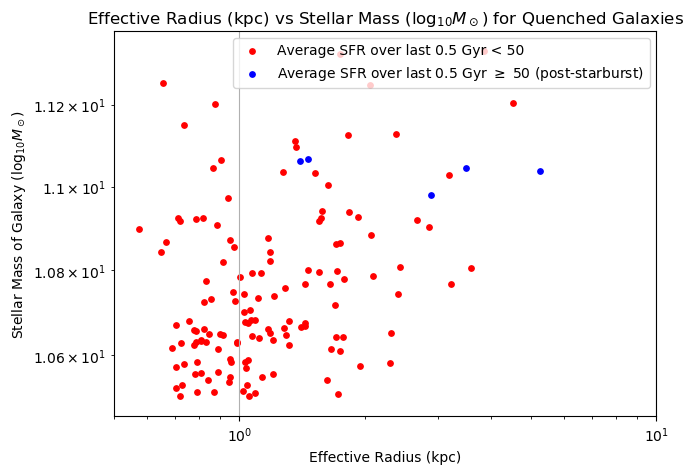

In [15]:
plt.style.use('default')
plt.figure(figsize=(7,5)) # 10 is width, 7 is height
plt.scatter(effective_radius[(current_SFR<2)&(average_SFR_0_5<50)], total_mass[(current_SFR<2)&(average_SFR_0_5<50)], c='r', s=15, label='Average SFR over last 0.5 Gyr < 50')
plt.scatter(effective_radius[(current_SFR<2)&(average_SFR_0_5>=50)], total_mass[(current_SFR<2)&(average_SFR_0_5>=50)], c='b', s=15, label='Average SFR over last 0.5 Gyr $\geq$ 50 (post-starburst)')
plt.xlim(0.5, 1e1)
#plt.ylim(0.5, 30)
plt.grid()
plt.legend()
#plt.colorbar(label = '$\log_{10}$ (Average SFR over last Gyr)')
plt.title('Effective Radius (kpc) vs Stellar Mass ($\log_{10} M_\odot$) for Quenched Galaxies')
plt.xlabel('Effective Radius (kpc)')
plt.ylabel('Stellar Mass of Galaxy ($\log_{10} M_\odot$)')
plt.xscale('log')
plt.yscale('log')

**SFH for the above Galaxies that made the Post-Starburst Cut:**

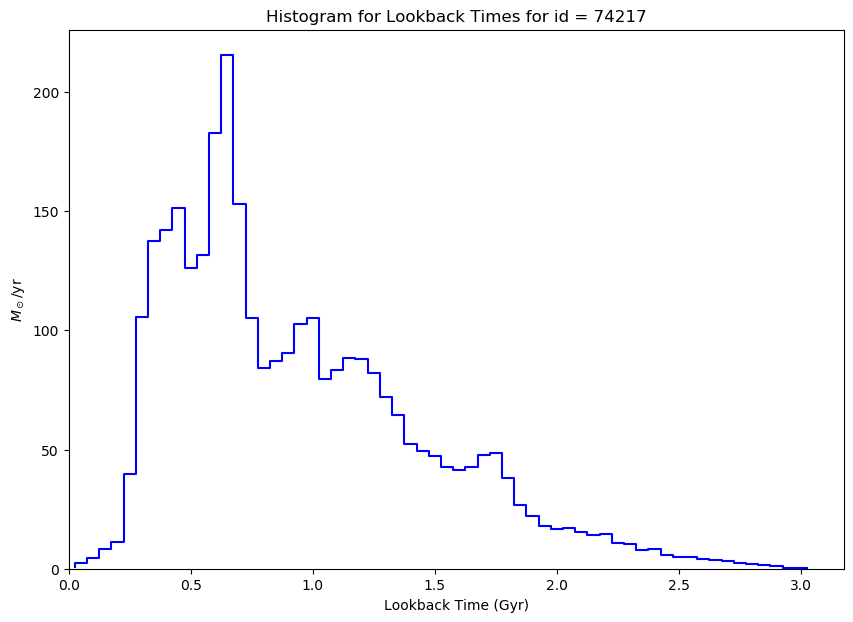

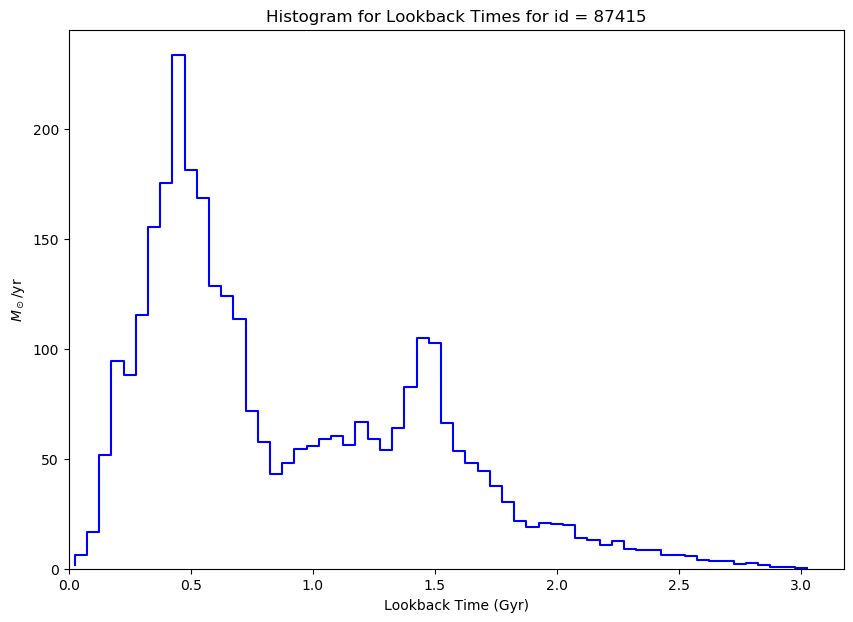

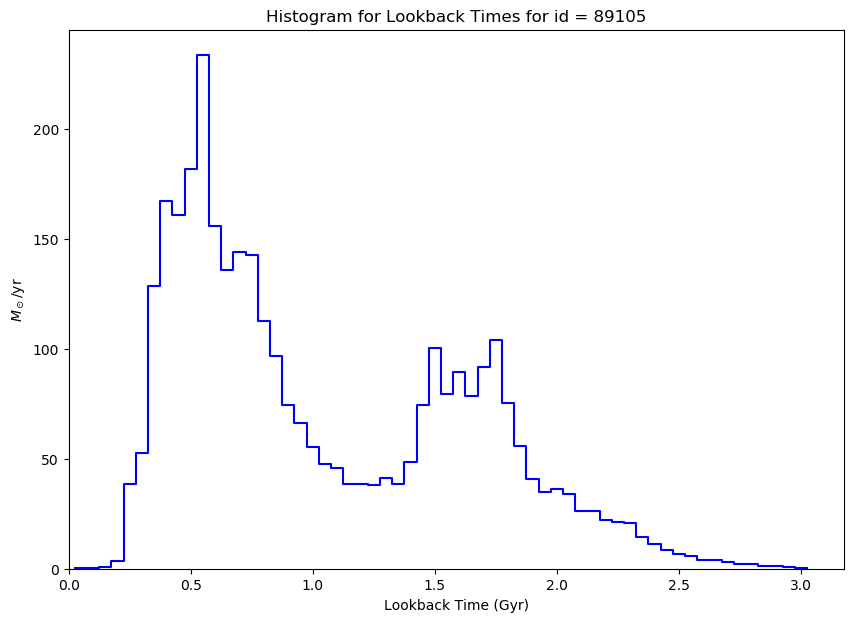

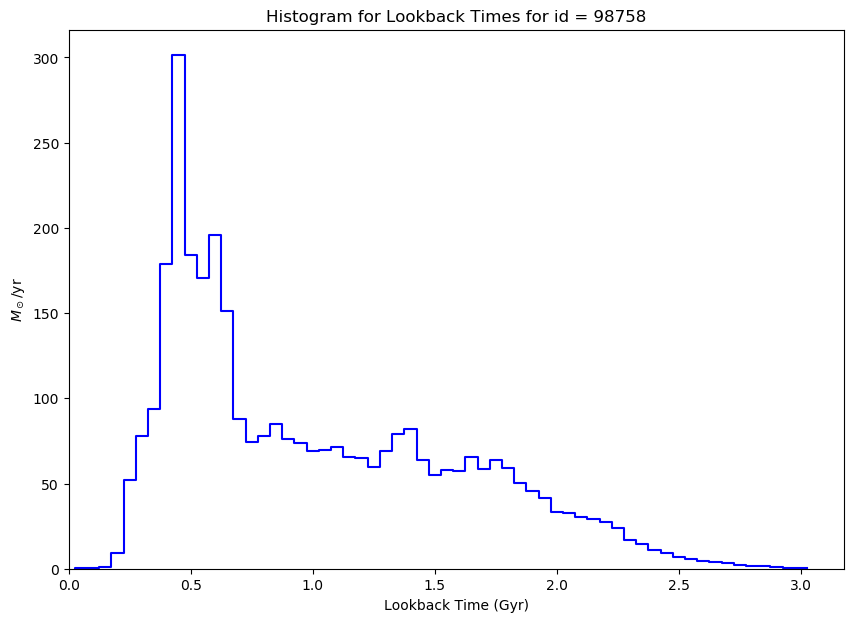

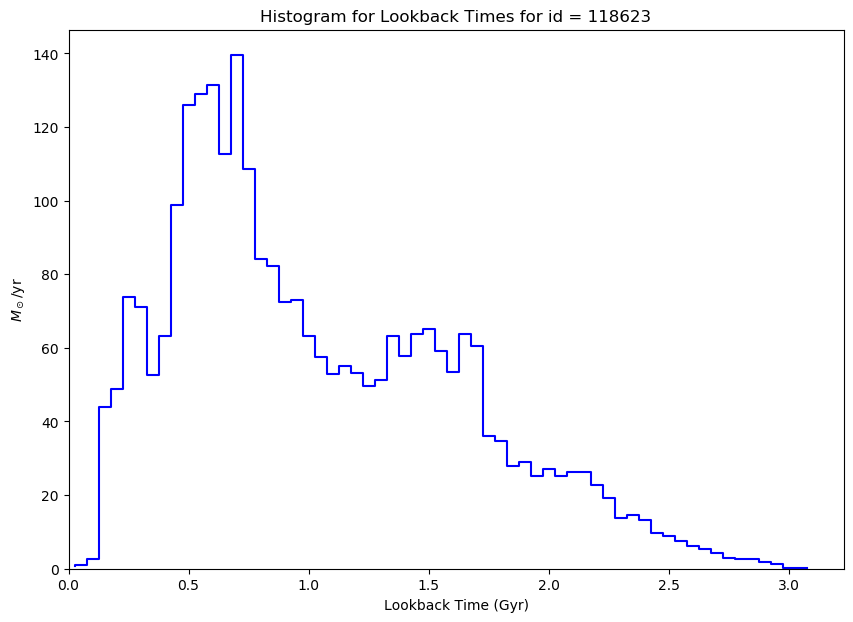

In [17]:
#For a sanity check XD
for id in ids[(current_SFR<2)&(average_SFR_0_5>=50)]:
    get_star_formation_history(id=id, redshift=2, plot=True, binwidth=0.05)

**Average SFR over 0.5 Gyr vs Effective Radius for Galaxies with Current SFR < 2 & Average SFR over 0.5 Gyr > 10**

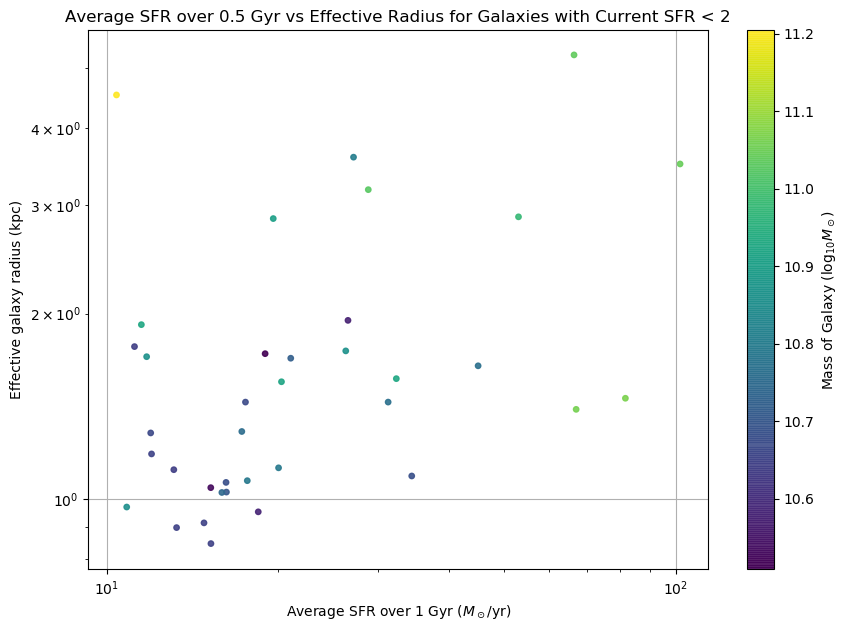

In [19]:
plt.style.use('default')
plt.figure(figsize=(10,7)) # 10 is width, 7 is height
plt.scatter(average_SFR_0_5[(current_SFR<2)&(average_SFR_0_5>10)], effective_radius[(current_SFR<2)&(average_SFR_0_5>10)], c=total_mass[(current_SFR<2)&(average_SFR_0_5>10)], s=15, alpha = 0.9)
#plt.xlim(1e-1, 1e3)#add mass as color
#plt.ylim(0.5, 30)
plt.grid()
plt.colorbar(label='Mass of Galaxy ($\log_{10} M_\odot$)')
plt.title('Average SFR over 0.5 Gyr vs Effective Radius for Galaxies with Current SFR < 2 & Average SFR over 0.5 Gyr > 10')
plt.xlabel('Average SFR over 1 Gyr ($M_\odot$/yr)')
plt.ylabel('Effective galaxy radius (kpc)')
plt.xscale('log')
plt.yscale('log')
#maybe add trendline?